In [1]:
# All required libraries are imported here for you.
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [2]:
#Load the dataset
blood = pd.read_csv('blood.csv')
blood = blood.rename(columns = {'Recency (months)': 'months since last donation',
                              'Frequency (times)': 'total number of donations', 
                              'Monetary (c.c. blood)': 'total blood donated (in c.c.)',
                             'Time (months)': 'months since first donation', 
                              'whether he/she donated blood in March 2007': 'Donated'})

# Create the log dataframe
log_blood = blood.copy()

# Fix values <= 0 by replacing them with NaN
log_blood['months since last donation'] = log_blood['months since last donation'].apply(lambda x: np.nan if x <= 0 else x)
log_blood['total number of donations'] = log_blood['total number of donations'].apply(lambda x: np.nan if x <= 0 else x)
log_blood['total blood donated (in c.c.)'] = log_blood['total blood donated (in c.c.)'].apply(lambda x: np.nan if x <= 0 else x)
log_blood['months since first donation'] = log_blood['months since first donation'].apply(lambda x: np.nan if x <= 0 else x)

# Take the logarithm of the fixed values
log_blood['months since last donation'] = np.log10(log_blood['months since last donation'])
log_blood['total number of donations'] = np.log10(log_blood['total number of donations'])
log_blood['total blood donated (in c.c.)'] = np.log10(log_blood['total blood donated (in c.c.)'])
log_blood['months since first donation'] = np.log10(log_blood['months since first donation'])

# Fix values NaN by replacing them with 0
log_blood['months since last donation'] = log_blood['months since last donation'].fillna(0)
log_blood['total number of donations'] = log_blood['total number of donations'].fillna(0)
log_blood['total blood donated (in c.c.)'] = log_blood['total blood donated (in c.c.)'].fillna(0)
log_blood['months since first donation'] = log_blood['months since first donation'].fillna(0)

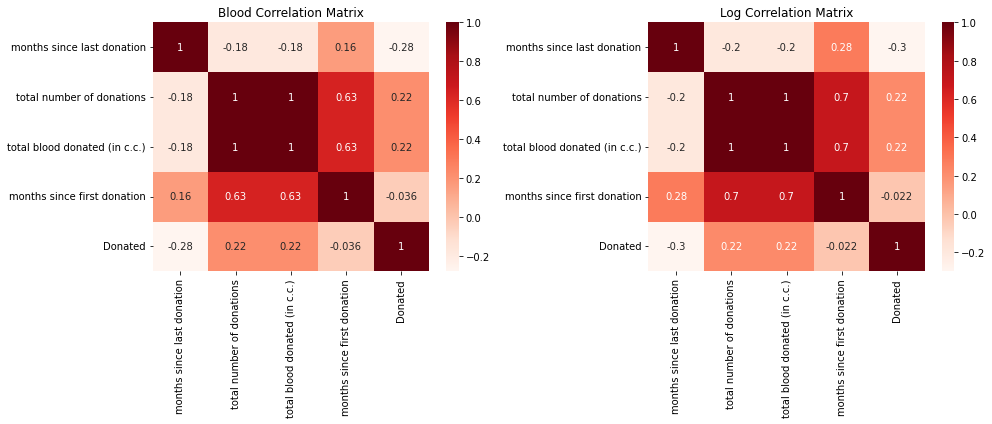

In [3]:
# Features
X = log_blood[['months since last donation', 'total number of donations', 
           'total blood donated (in c.c.)', 'months since first donation']]

# Labels
y = log_blood['Donated']

# Compute the correlation matrix for blood df and log_blood df
blood_corr = blood.corr()
log_corr = log_blood.corr()

# Reorder the columns and rows of both correlation matrices to match
common_columns = blood_corr.columns.intersection(log_corr.columns)
blood_corr = blood_corr[common_columns].loc[common_columns]
log_corr = log_corr[common_columns].loc[common_columns]

# Create a side-by-side heatmap comparison
fig, ax = plt.subplots(1, 2, figsize = (14, 6))

# Plot the first heatmap
sns.heatmap(blood_corr, annot = True, cmap = 'Reds', ax = ax[0])
ax[0].set_title('Blood Correlation Matrix')

# Plot the second heatmap
sns.heatmap(log_corr, annot = True, cmap = 'Reds', ax = ax[1])
ax[1].set_title('Log Correlation Matrix')

plt.tight_layout()
plt.show()

In [4]:
# Features
X = blood[['months since last donation', 'total number of donations', 
           'total blood donated (in c.c.)']]
features = ['months since last donation', 'total number of donations', 
           'total blood donated (in c.c.)']

# Labels
y = blood['Donated']

In [5]:
np.random.seed(123)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size = 0.3)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size = 0.33)

print('Training:', X_train.shape)
print('Validating:', X_valid.shape)
print('Testing:', X_test.shape)

Training: (523, 3)
Validating: (150, 3)
Testing: (75, 3)


In [6]:
y_test.value_counts()

0    53
1    22
Name: Donated, dtype: int64

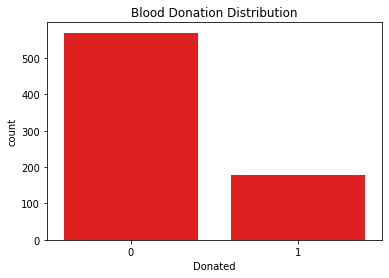

In [7]:
# Visualizing the data
sns.countplot(x = 'Donated', data = log_blood, color = 'red')
plt.title('Blood Donation Distribution')
plt.show()

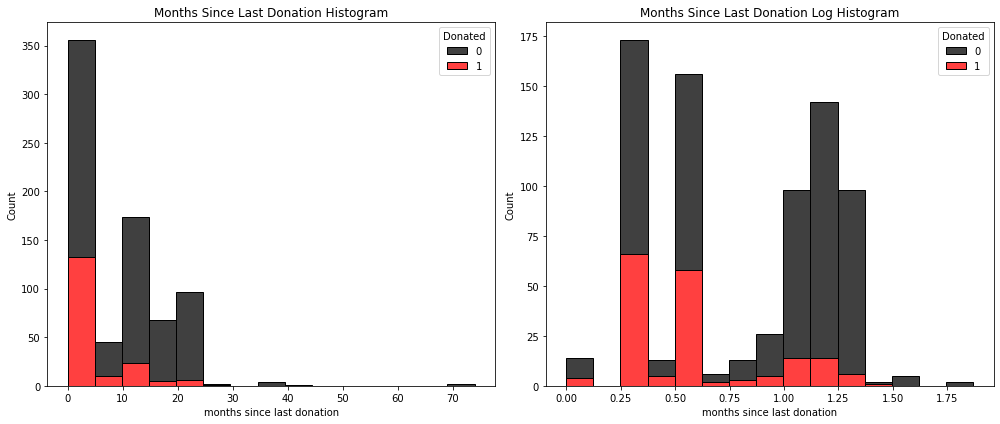

In [8]:
# Create a side-by-side histogram comparison
fig, ax = plt.subplots(1, 2, figsize = (14, 6))

# Plot the first histogram
sns.histplot(data = blood, x = 'months since last donation', hue = 'Donated', multiple = 'stack', 
             bins = 15, palette = ['black', 'red'], ax = ax[0])
ax[0].set_title('Months Since Last Donation Histogram')

# Plot the second histogram
sns.histplot(data = log_blood, x = 'months since last donation', hue = 'Donated', multiple = 'stack', 
             bins = 15, palette = ['black', 'red'], ax = ax[1])
ax[1].set_title('Months Since Last Donation Log Histogram')

plt.tight_layout()
plt.show()

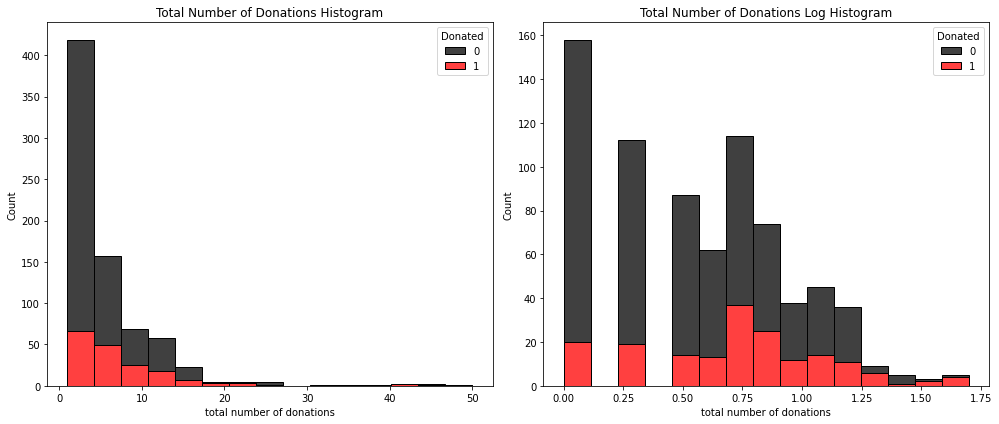

In [9]:
# Create a side-by-side histogram comparison
fig, ax = plt.subplots(1, 2, figsize = (14, 6))

# Plot the first histogram
sns.histplot(data = blood, x = 'total number of donations', hue = 'Donated', multiple = 'stack', 
             bins = 15, palette = ['black', 'red'], ax = ax[0])
ax[0].set_title('Total Number of Donations Histogram')

# Plot the second histogram
sns.histplot(data = log_blood, x = 'total number of donations', hue = 'Donated', multiple = 'stack', 
             bins = 15, palette = ['black', 'red'], ax = ax[1])
ax[1].set_title('Total Number of Donations Log Histogram')

plt.tight_layout()
plt.show()

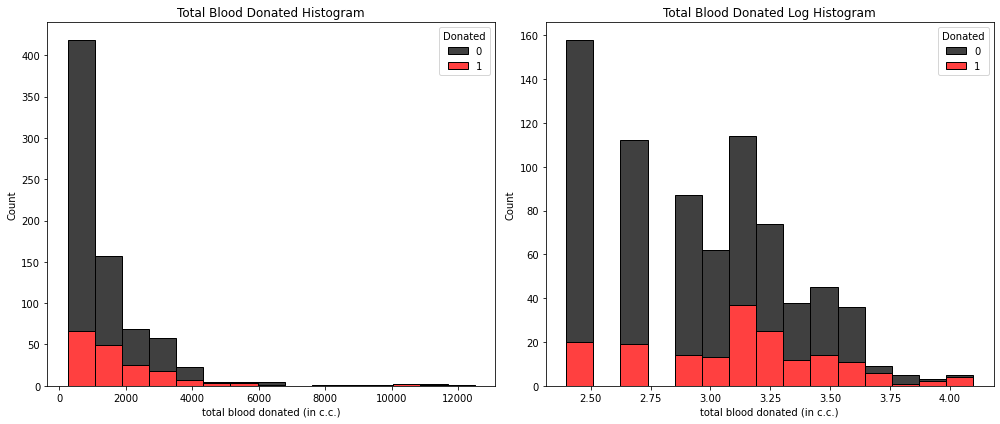

In [10]:
# Create a side-by-side histogram comparison
fig, ax = plt.subplots(1, 2, figsize = (14, 6))

# Plot the first histogram
sns.histplot(data = blood, x = 'total blood donated (in c.c.)', hue = 'Donated', multiple = 'stack', 
             bins = 15, palette = ['black', 'red'], ax = ax[0])
ax[0].set_title('Total Blood Donated Histogram')

# Plot the second histogram
sns.histplot(data = log_blood, x = 'total blood donated (in c.c.)', hue = 'Donated', multiple = 'stack', 
             bins = 15, palette = ['black', 'red'], ax = ax[1])
ax[1].set_title('Total Blood Donated Log Histogram')

plt.tight_layout()
plt.show()

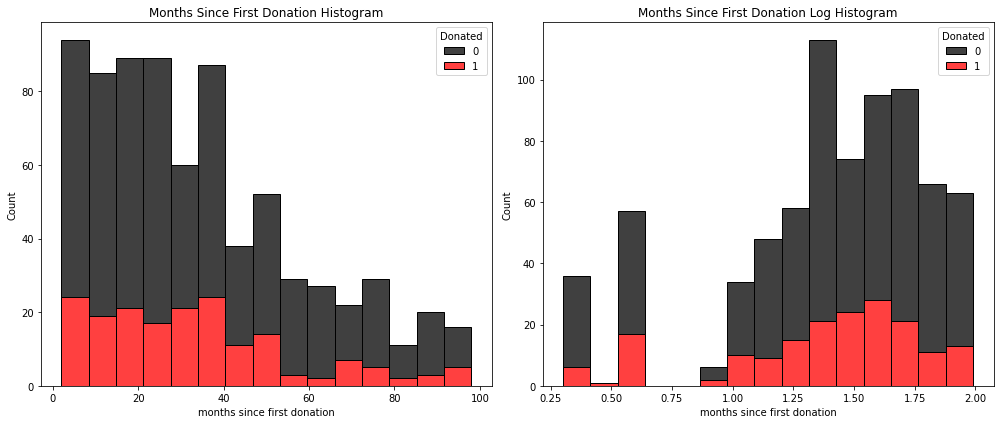

In [11]:
# Create a side-by-side histogram comparison
fig, ax = plt.subplots(1, 2, figsize = (14, 6))

# Plot the first histogram
sns.histplot(data = blood, x = 'months since first donation', hue = 'Donated', multiple = 'stack', 
             bins = 15, palette = ['black', 'red'], ax = ax[0])
ax[0].set_title('Months Since First Donation Histogram')

# Plot the second histogram
sns.histplot(data = log_blood, x = 'months since first donation', hue = 'Donated', multiple = 'stack', 
             bins = 15, palette = ['black', 'red'], ax = ax[1])
ax[1].set_title('Months Since First Donation Log Histogram')

plt.tight_layout()
plt.show()